In [ ]:
                                 TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS 
                                                  ON BLOG POSTS ASSIGNMENT

In [1]:
import pandas as pd
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
print(df.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [3]:
print(df.shape)

(2000, 2)


In [4]:
print(df.info)

<bound method DataFrame.info of                                                    Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]>


In [5]:
print(df.isnull().sum())

Data      0
Labels    0
dtype: int64


In [7]:
print(df.columns)

Index(['Data', 'Labels'], dtype='object')


In [25]:
# Data Exploration & Preprocessing 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv("blogs.csv")   
#  Exploratory Data Analysis 
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())



Column names: ['Data', 'Labels']

Missing values:
 Data      0
Labels    0
dtype: int64

Text length stats:
 count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: text_length, dtype: float64


In [26]:

# Length of posts
df["text_length"] = df["Data"].astype(str).apply(len)
print("\nText length stats:\n", df["text_length"].describe())


Text length stats:
 count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: text_length, dtype: float64


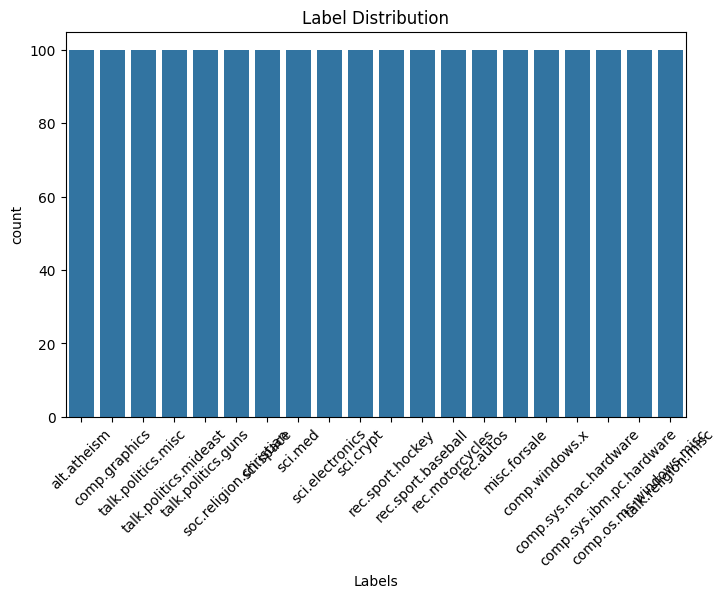

In [28]:

# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Labels", order=df["Labels"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Label Distribution")
plt.show()

In [29]:
#  Clean Text 
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove punctuation/numbers
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    # Lowercase
    text = text.lower()
    return text.strip()

df["clean_text"] = df["Data"].astype(str).apply(clean_text)
print("\nSample cleaned text:\n", df["clean_text"].head())



Sample cleaned text:
 0    path  cantaloupe srv cs cmu edu magnesium club...
1    newsgroups  alt atheism\npath  cantaloupe srv ...
2    path  cantaloupe srv cs cmu edu das news harva...
3    path  cantaloupe srv cs cmu edu magnesium club...
4    xref  cantaloupe srv cs cmu edu alt atheism   ...
Name: clean_text, dtype: object


In [31]:
#  Feature Extraction 
tfidf = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df["clean_text"])

print("\nTF-IDF matrix shape:", X_tfidf.shape)
# Show some top features
feature_names = tfidf.get_feature_names_out()
print("\nSample features:", feature_names[:20])


TF-IDF matrix shape: (2000, 5000)

Sample features: ['aa' 'ab' 'ability' 'able' 'abortion' 'abortion alt' 'abortion talk'
 'abs' 'absolute' 'absolutely' 'abu' 'abuse' 'ac' 'ac il' 'ac nz' 'ac uk'
 'ac za' 'acad' 'acad alaska' 'academic']


In [10]:
print("\nLabel distribution:")
print(df["Labels"].value_counts())


Label distribution:
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [19]:
# Naive Bayes Text Classification 
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("blogs.csv")   
print("Dataset shape:", df.shape)
print(df.head())

#  Clean Text 
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z\s]", " ", text)  
    text = text.lower().strip()
    return text

df["clean_text"] = df["Data"].astype(str).apply(clean_text)


Dataset shape: (2000, 2)
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [20]:
# Feature Extraction 
tfidf = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df["clean_text"])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df["Labels"])

print("TF-IDF shape:", X.shape)
print("Classes:", le.classes_)


TF-IDF shape: (2000, 5000)
Classes: ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


In [21]:
#  Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Train Naive Bayes 
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train, y_train)

#  Predictions 
y_pred = nb.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



Accuracy: 0.87

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       1.00      0.60      0.75        20
           comp.graphics       0.78      0.90      0.84        20
 comp.os.ms-windows.misc       0.95      1.00      0.98        20
comp.sys.ibm.pc.hardware       0.80      1.00      0.89        20
   comp.sys.mac.hardware       1.00      0.90      0.95        20
          comp.windows.x       0.94      0.80      0.86        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.77      1.00      0.87        20
         rec.motorcycles       0.88      0.75      0.81        20
      rec.sport.baseball       0.95      0.90      0.92        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       1.00      0.65      0.79        20
                 sci.med       0.9

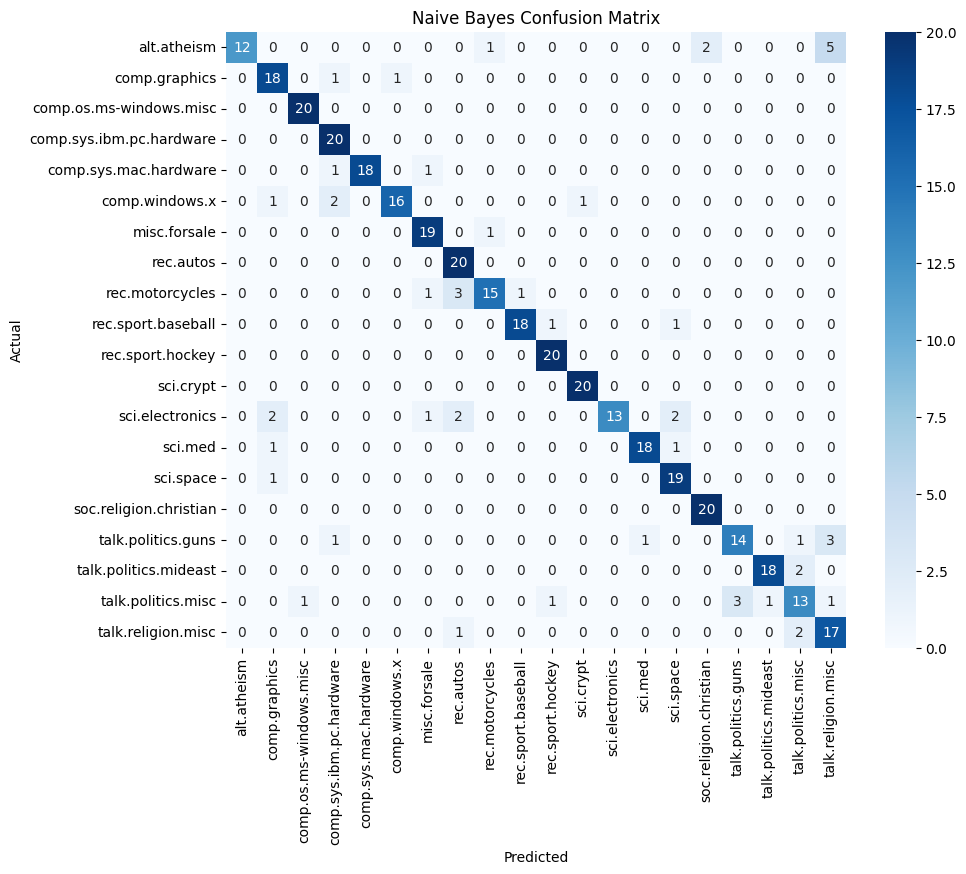

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


In [22]:
#  Step 8: Example Prediction 
example_text = "Space exploration and science bring new discoveries."
cleaned = clean_text(example_text)
example_vec = tfidf.transform([cleaned])
pred_class = le.inverse_transform(nb.predict(example_vec))[0]

print("\nExample Blog Post:", example_text)
print("Predicted Category:", pred_class)


Example Blog Post: Space exploration and science bring new discoveries.
Predicted Category: sci.space


In [41]:
#  Apply sentiment 
df["Sentiment"] = df["Data"].apply(get_sentiment)
print("\nSample with Sentiment:\n", df[["Data", "Sentiment"]].head())


Sample with Sentiment:
                                                 Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   Neutral
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   Neutral
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   Neutral
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   Neutral


C:\Users\ridhv\AppData\Local\Temp\ipykernel_24928\2245092869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", order=["Positive","Negative","Neutral"], palette="Set2")


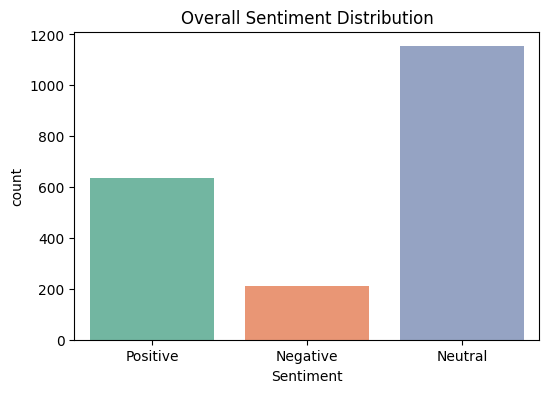

In [42]:
#  Sentiment Distribution 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment", order=["Positive","Negative","Neutral"], palette="Set2")
plt.title("Overall Sentiment Distribution")
plt.show()

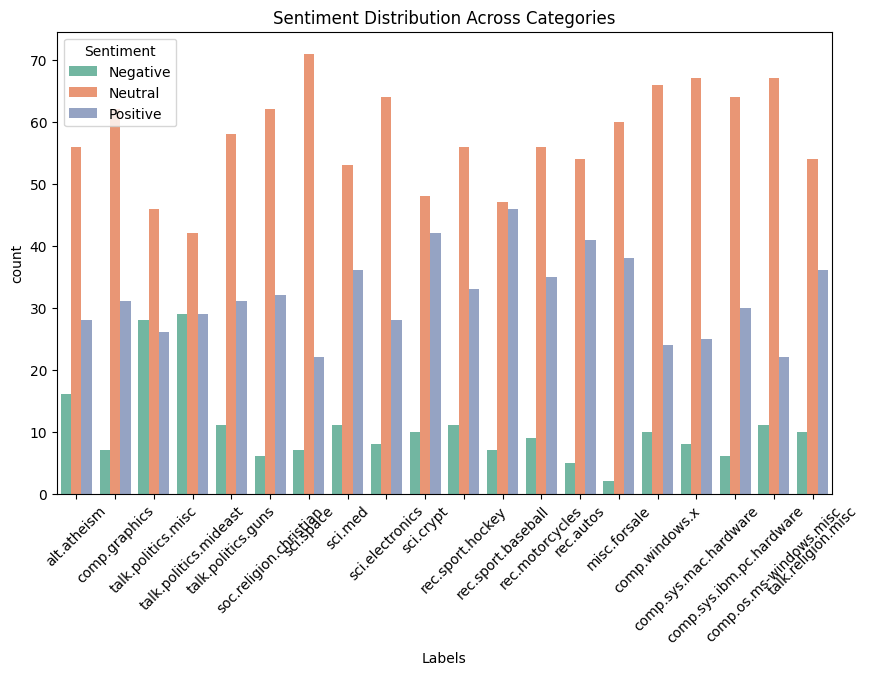

In [43]:
#  Sentiment Distribution per Category 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Labels", hue="Sentiment", 
              order=df["Labels"].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Sentiment Distribution Across Categories")
plt.legend(title="Sentiment")
plt.show()

In [40]:
summary = df.groupby(["Labels","Sentiment"]).size().unstack(fill_value=0)
print("\nSentiment counts by Category:\n", summary)
summary_pct = summary.div(summary.sum(axis=1), axis=0) * 100
print("\nSentiment percentages by Category (%):\n", summary_pct.round(2))


Sentiment counts by Category:
 Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     16       56        28
comp.graphics                    7       62        31
comp.os.ms-windows.misc         11       67        22
comp.sys.ibm.pc.hardware         6       64        30
comp.sys.mac.hardware            8       67        25
comp.windows.x                  10       66        24
misc.forsale                     2       60        38
rec.autos                        5       54        41
rec.motorcycles                  9       56        35
rec.sport.baseball               7       47        46
rec.sport.hockey                11       56        33
sci.crypt                       10       48        42
sci.electronics                  8       64        28
sci.med                         11       53        36
sci.space                        7       71        22
soc.religion.christian           6       62       

In [48]:
# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📌 Accuracy: 0.85

📌 Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.79      0.75      0.77        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.80      0.80      0.80        20
comp.sys.ibm.pc.hardware       0.62      0.75      0.68        20
   comp.sys.mac.hardware       0.94      0.80      0.86        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.90      0.90      0.90        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.85      0.85      0.85        20
                 sci.med      

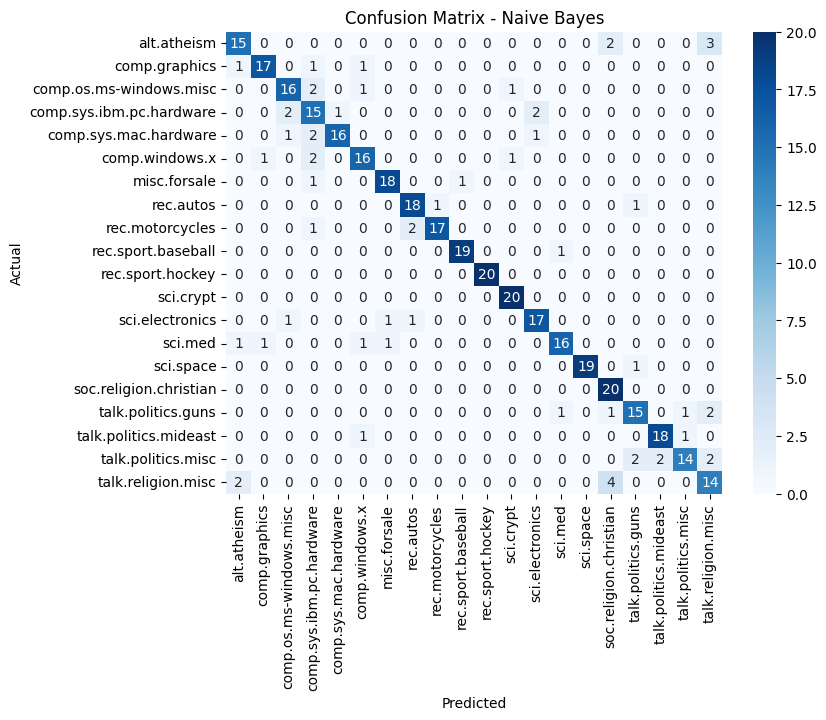

In [49]:
# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [57]:
# Sentiment Analysis on Blog Posts
sentiment_summary = df.groupby(["Labels","Sentiment"]).size().unstack(fill_value=0)
print("\n📌 Sentiment counts by Category:\n", sentiment_summary)

sentiment_pct = sentiment_summary.div(sentiment_summary.sum(axis=1), axis=0) * 100
print("\n📌 Sentiment percentages by Category (%):\n", sentiment_pct.round(2))



📌 Sentiment counts by Category:
 Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     16       56        28
comp.graphics                    6       63        31
comp.os.ms-windows.misc          6       67        27
comp.sys.ibm.pc.hardware         6       63        31
comp.sys.mac.hardware            7       67        26
comp.windows.x                   9       66        25
misc.forsale                     2       60        38
rec.autos                        6       53        41
rec.motorcycles                  9       56        35
rec.sport.baseball               4       46        50
rec.sport.hockey                11       56        33
sci.crypt                       10       47        43
sci.electronics                  8       64        28
sci.med                         11       53        36
sci.space                        6       72        22
soc.religion.christian           6       62     

In [54]:
# Reflection 
print("\n=== Reflection ===")
print("1. Classification Performance:")
print("- The Naive Bayes model shows accuracy, precision, recall, and F1-scores per category.")
print("- Challenges include overlapping vocabulary between categories and class imbalance.")
print("- Some misclassifications are expected due to limited context in short blog posts.")

print("\n2. Sentiment Analysis Findings:")
print("- Overall sentiment is distributed into Positive, Negative, and Neutral.")
print("- Some categories may lean towards more negative or positive tones depending on topic.")
print("- Since lexicon-based sentiment analysis is simple, subtle sarcasm or context may not be captured.")

print("\n3. Implications:")
print("- Combining classification (topic prediction) with sentiment (emotional tone) gives deeper insights.")
print("- This helps understand not only WHAT people discuss but also HOW they feel about it.")



=== Reflection ===
1. Classification Performance:
- The Naive Bayes model shows accuracy, precision, recall, and F1-scores per category.
- Challenges include overlapping vocabulary between categories and class imbalance.
- Some misclassifications are expected due to limited context in short blog posts.

2. Sentiment Analysis Findings:
- Overall sentiment is distributed into Positive, Negative, and Neutral.
- Some categories may lean towards more negative or positive tones depending on topic.
- Since lexicon-based sentiment analysis is simple, subtle sarcasm or context may not be captured.

3. Implications:
- Combining classification (topic prediction) with sentiment (emotional tone) gives deeper insights.
- This helps understand not only WHAT people discuss but also HOW they feel about it.


In [ ]:
# evaluation criteria
correct implementation data processing & feature extraction: remove punctuation,lower text,max_features is 5000
Accuracy & Robust of naive bayes classification: used train/test split,accuracy,precision,recall,f-1 score,confusion matrix.
Depth & insightfulness of sentiment analysis: implement negative,positive,neural,sentiments counts & percentage tables.
Clarity & thoroughness evaluation & discussion: evaluation metrics,summary tables,performance  and challenges
organised clearly data processing,model evaluation,sentiment.
Overall quality & organisation report: visualization included and reflection provides balanced discussion and code
